In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris, load_breast_cancer, load_wine, load_diabetes
import sys

sys.path.insert(0, '..\\CountsOutlierDetector')
from counts_outlier_detector import CountsOutlierDetector

In [2]:
# This data provides some simple synthetic and real examples. All 
# anomalilies idetified in these examples are in one or two dimensions.

## Simple Synthetic Example

In [3]:
det = CountsOutlierDetector()

In [4]:
# Create a simple, random, synthetic dataset
a = np.random.uniform(low=0.0, high=100.0, size=(5_000, 10))

# Create a row (Row 0) with one unusual value
a[0, 0] = 1000.0

# Create a row (Row 1) with two unusual values
a[1, 0] = 1100.0
a[1, 1] = 1200.0

# Create a row (Row 2) with one unusual pair of values. We first set 
# column 4 to be the same as 3 in most cases but one, Row 2, where 
# they have different values.
a[:, 4] = a[:, 3]
a[2, 3] = 90.0
a[2, 4] = 5.0

# It is not necessary to pass a pandas dataframe, but creating one 
# allows us to specify column names
a = pd.DataFrame(a, columns=['Column A', 'Column B', 'Column C', 'Column D', 'Column E', 
                             'Column F', 'Column G', 'Column H', 'Column I', 'Column J'])

# Calling predict() returns the set of outliers, along with summary information. 
# results includes an element 'Breakdown All Rows', which is useful for analysis, but not for display purposes.
# We show the 'Breakdown Flagged Rows' element, which is a condensed version of this, though also not intended
# typically for display. 
results = det.predict(a)

In [5]:
# Calling run_summary() provides an overview of the run. In this case, we
# see that outliers were found in 1d and 2d, which matches the known 
# outliers specifically inserted above. 

det.print_run_summary()


Number of rows: 5000
Number of columns: 10
Cardinality of the columns (after binning numeric columns): [2, 2, 7, 7, 7, 7, 7, 7, 7, 7]

1d: Number of common values (over all columns): 58
1d: Number of rare values: 2
Number of rows given score:  0:  4998
Number of rows given score:  1:     1
Number of rows given score:  2:     1

2d: Number of common combinations (over all columns): 1,558
2d: Number of rare combinations: 42
Number of rows given score:  0:  4999
Number of rows given score:  1:     1

3d: Number of common combinations (over all columns): 24,920
3d: Number of rare combinations: 0
Number of rows given score:  0:  5000

Number of rows flagged as outliers examining 1d:   2 (0.04%)
Number of rows flagged as outliers examining 2d:   1 (0.02%)
Number of rows flagged as outliers examining 3d:   0 (0.0%)


In [6]:
# 'Flagged Summary' provides a high-level overview of what was found at each dimensionality. 

results['Flagged Summary']

,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,True,False,False,False,0.04,0.02,0.0,0.0,0.0,0.0,0.04,0.06,0.06,0.06,0.06,0.06,0.06


In [7]:
# We see there are 3 rows flagged, which are the 3 with known anomalies. 

most_flagged_df = det.get_most_flagged_rows()
most_flagged_df

,TOTAL SCORE,Column A,Column B,Column C,Column D,Column E,Column F,Column G,Column H,Column I,Column J
1,2,6,6,3,6,6,0,0,5,5,6
0,1,6,0,4,3,3,4,3,6,6,2
2,1,0,0,3,6,0,4,1,6,3,2


**Explanation row number**: 1

**Total score**: 2

### Unusual value in column: Column A (1100.0)

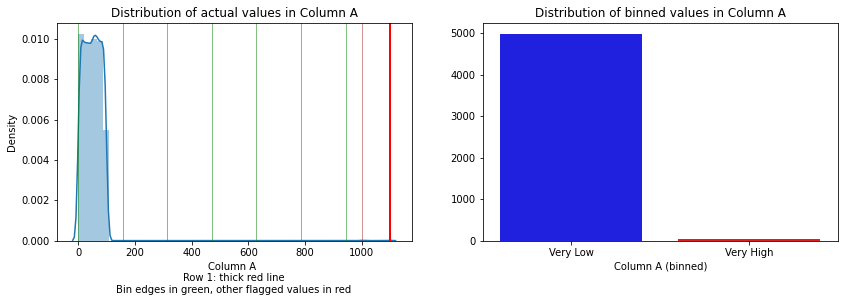

### Unusual value in column: Column B (1200.0)

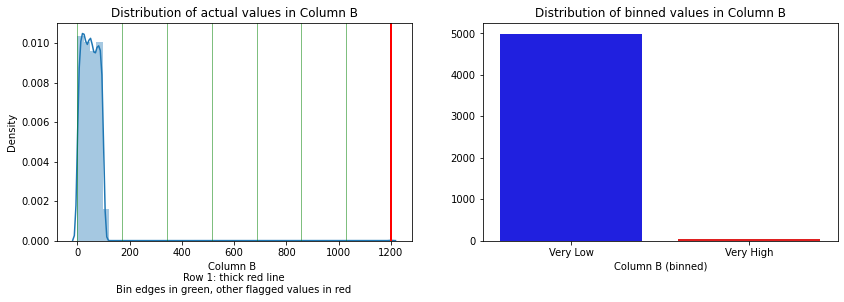

In [8]:
# We get an explanation of one of these rows, Row 1

det.explain_row(1)

**Explanation row number**: 2

**Total score**: 1

### Unusual values in column: Column D (90.0) and in column: Column E: (5.0)

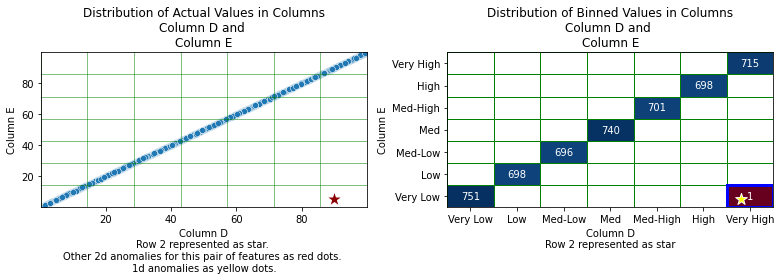

In [9]:
# We also get an explanation of Row 2, which was flagged in a 
# two-dimensional space. 

det.explain_row(2)

## Example with Iris Dataset

In [10]:
def get_iris():
    iris = load_iris()
    X, y = iris.data, iris.target
    X = pd.DataFrame(X, columns=iris['feature_names'])
    return X, y

In [11]:
X,y = get_iris()
results = det.predict(X)

In [12]:
# The iris dataset has no outliers, at least in the sense provided
# by CountsOutlierDetector

det.get_most_flagged_rows()

No rows were flagged.


,TOTAL SCORE,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


## Example with Breast Cancer Dataset

In [13]:
def get_breast_cancer():
    X, y = load_breast_cancer(return_X_y=True, as_frame=True)
    return X, y

In [14]:
X,y = get_breast_cancer()
det = CountsOutlierDetector(threshold=0.25)
results = det.predict(X)

In [15]:
results['Flagged Summary']

,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,False,False,False,False,8.787346,40.59754,0.0,0.0,0.0,0.0,8.787346,40.949033,40.949033,40.949033,40.949033,40.949033,40.949033


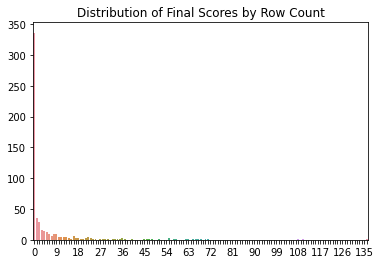

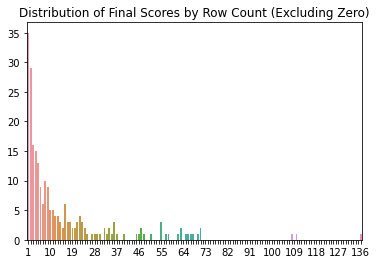

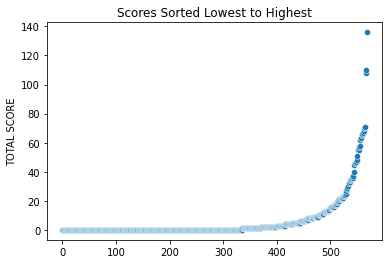

In [16]:
det.plot_scores_distribution()

In [17]:
det.get_most_flagged_rows().head()

,TOTAL SCORE,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
108,136,5,2,5,4,5,5,6,6,5,...,5,2,5,3,4,4,5,6,3,1
122,110,5,2,5,4,5,5,6,6,5,...,4,2,4,3,4,2,3,5,2,1
0,108,3,0,3,2,4,5,4,5,4,...,4,0,4,3,4,4,3,6,4,2
258,71,2,3,3,1,3,6,5,4,5,...,2,3,3,1,3,3,3,5,2,2
339,71,5,3,5,4,3,2,3,4,2,...,5,3,5,4,3,1,2,5,1,1


**Explanation row number**: 108

**Total score**: 136

Displaying first 10 plots


### Unusual value in column: mean concavity (0.4264)

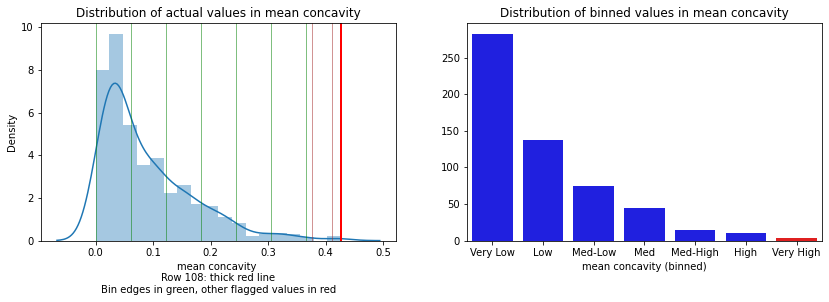

### Unusual value in column: mean concave points (0.1823)

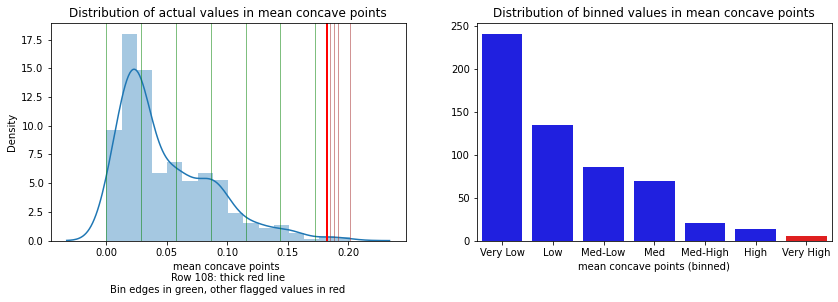

### Unusual value in column: perimeter error (10.05)

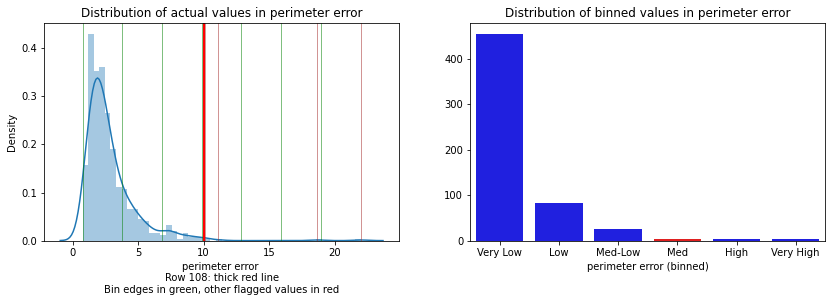

### Unusual value in column: worst concavity (0.9608)

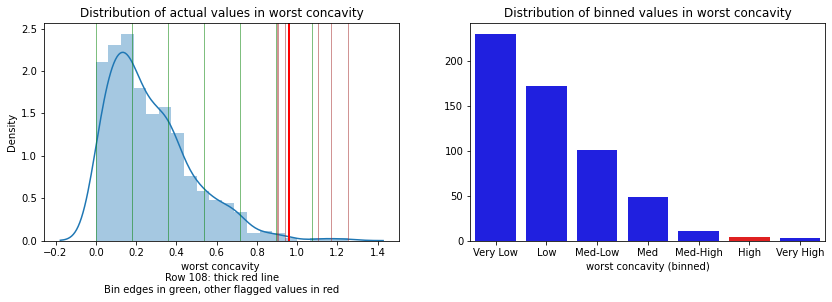

### Unusual values in column: mean radius (22.27) and in column: mean smoothness: (0.1326)

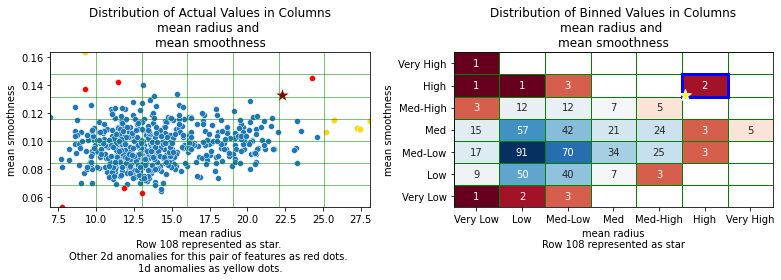

### Unusual values in column: mean radius (22.27) and in column: mean compactness: (0.2768)

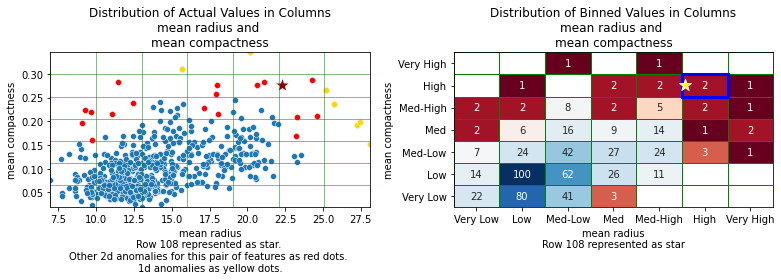

### Unusual values in column: mean radius (22.27) and in column: mean symmetry: (0.2556)

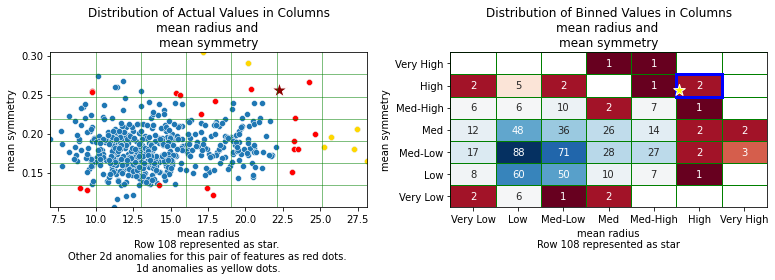

### Unusual values in column: mean radius (22.27) and in column: mean fractal dimension: (0.07039)

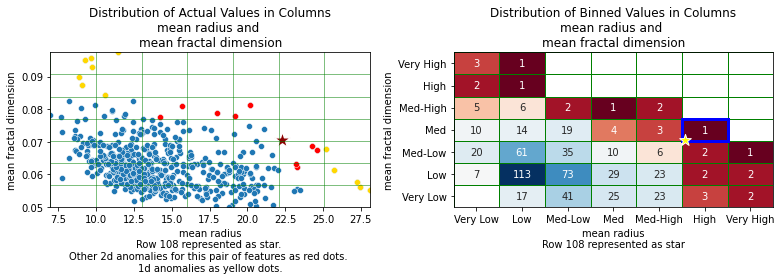

### Unusual values in column: mean radius (22.27) and in column: texture error: (1.545)

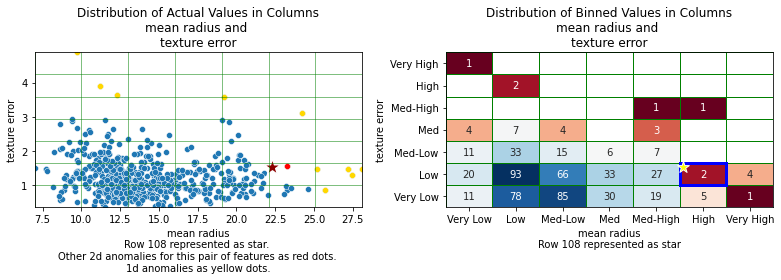

### Unusual values in column: mean radius (22.27) and in column: area error: (170.0)

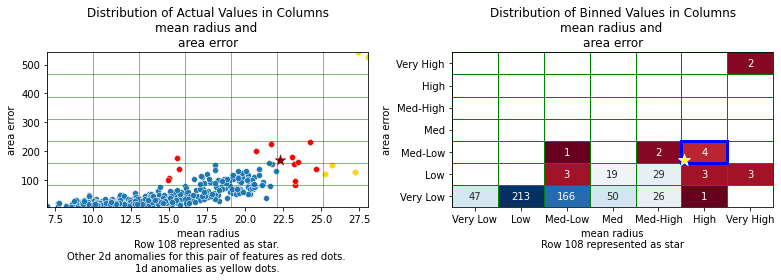

In [18]:
# Here, we expect some features to be highly correlated, which the 2d scatter
# plots demonstrate. Any unusual combinations of values can be seen intuitively
# as outliers. 

det.explain_row(108, max_plots=10)

## Example with Wine Dataset

In [19]:
def get_wine():
    X, y = load_wine(return_X_y=True, as_frame=True)
    return X, y

In [20]:
x, y = get_wine()
results = det.predict(x)

det.get_most_flagged_rows()

,TOTAL SCORE,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
59,1,2,0,0,0,1,2,0,1,0,0,3,1,1
115,1,0,1,3,3,1,3,2,5,3,0,6,4,0
121,1,0,1,6,6,3,5,6,4,3,2,2,6,0


In [21]:
results['Flagged Summary']

,Checked_2d,Checked_3d,Checked_4d,Checked_5d,Checked_6d,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged as 6d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Percent Flagged up to 6d,Percent Flagged
0,True,True,False,False,False,1.685393,0.0,0.0,0.0,0.0,0.0,1.685393,1.685393,1.685393,1.685393,1.685393,1.685393,1.685393


**Explanation row number**: 59

**Total score**: 1

### Unusual value in column: ash (1.36)

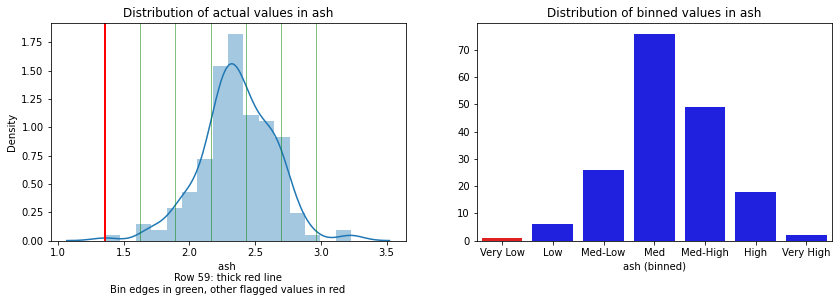

In [22]:
det.explain_row(59)

## Example with Diabetes Dataset

In [23]:
def get_diabetes():
    X, y =load_diabetes(return_X_y=True, as_frame=True)
    return X, y

In [24]:
x, y = get_diabetes()
 
det = CountsOutlierDetector()
results = det.predict(x)

det.get_most_flagged_rows().head(10)

,TOTAL SCORE,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
123,2,3,1,3,3,6,6,1,6,3,5
166,1,1,1,0,2,0,0,2,0,1,0
216,1,3,1,3,4,4,4,0,5,4,4
230,1,2,1,4,1,6,6,2,3,4,5
256,1,1,0,6,1,2,2,1,2,4,3
322,1,4,1,4,4,3,1,0,6,6,5
366,1,1,1,6,2,4,3,1,3,5,4
367,1,3,1,6,3,3,3,2,2,4,4


**Explanation row number**: 123

**Total score**: 2

### Unusual value in column: s2 (0.198787989657293)

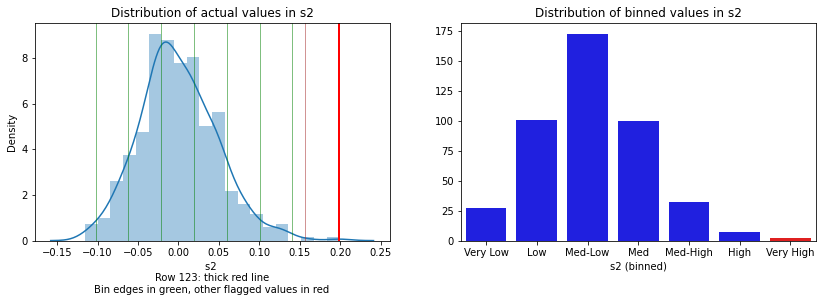

### Unusual value in column: s4 (0.185234443260194)

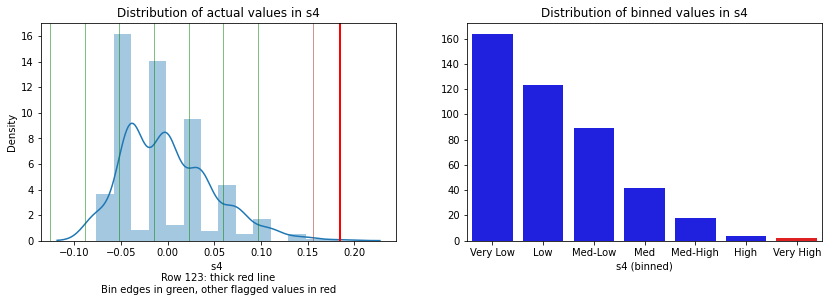

In [25]:
det.explain_row(123)